In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Faltungsoperatoren
Bitte experimentieren Sie mit den folgenden Faltungsfiltern und achten Sie auf den Einfluss des Strukturelements, dessen Größe und Inhalt.

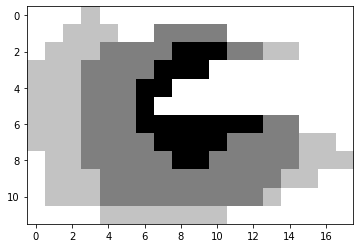

In [2]:
img = cv.imread('./img/raw_gray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## Mittelwertfilter

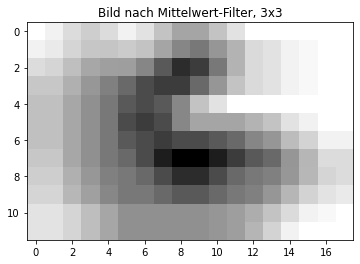

In [3]:
# Der Aufbau der Faltungsoperation mit OpenCV gestaltet sich im Folgenden immer gleich: 
# 1. definiere dene Faltungskernel
kernel = np.ones((3, 3), np.float32) / 9
# 2. wende Faltungskernel an (Syntax: filter2D(src, ddepth, kernel))
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 3x3')
plt.show()

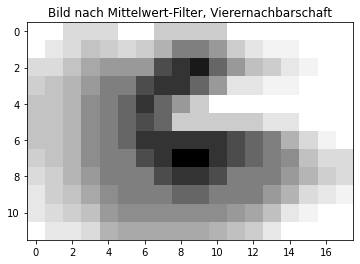

In [4]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.float32) / 5
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, Vierernachbarschaft')
plt.show()

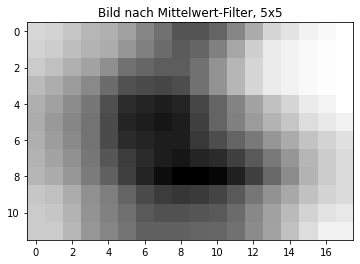

In [5]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 5x5')
plt.show()

## Gaußscher Glättungsfilter

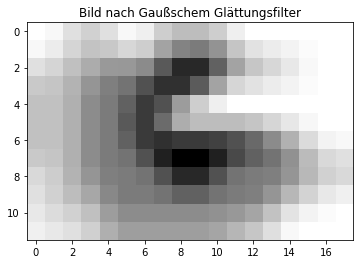

In [6]:
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Gaußschem Glättungsfilter')
plt.show()

## Schärfungsfilter

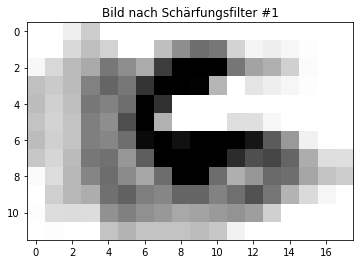

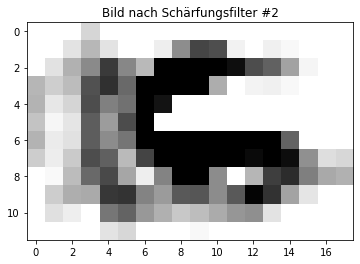

In [7]:
kernel1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
sharp1 = cv.filter2D(dst, -1, kernel1)
plt.imshow(sharp1, cmap='gray')
plt.title('Bild nach Schärfungsfilter #1')
plt.show()

kernel2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], np.float32)
sharp2 = cv.filter2D(dst, -1, kernel2)
plt.imshow(sharp2, cmap='gray')
plt.title('Bild nach Schärfungsfilter #2')
plt.show()

## Laplace Kantenfilter

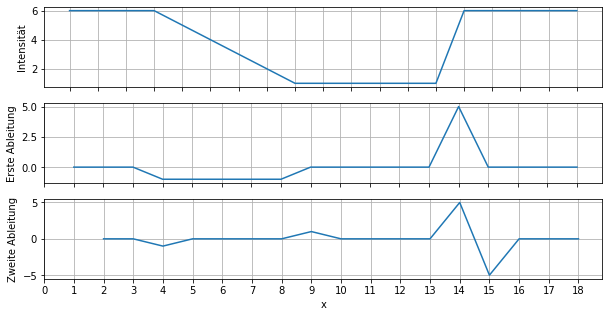

In [8]:
# Beispiel zur Illustration von Laplace-Kantenfiltern
y = np.array([6, 6, 6, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6])
x = np.arange(0, y.size)
y_d = np.diff(y)  # 1. Ableitung
y_dd = np.diff(y_d)  # 2. Ableitung

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.xticks(x)
plt.ylabel('Intensität')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.grid(True)

ax2 = plt.subplot(3, 1, 2)
plt.plot(x[1:], y_d)
plt.xticks(x)
plt.ylabel('Erste Ableitung')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid(True)

ax3 = plt.subplot(3, 1, 3)
plt.plot(x[2:], y_dd)
plt.xticks(x)
plt.ylabel('Zweite Ableitung')
plt.xlabel('x')
ax3 = plt.setp(ax3.get_xticklabels(), visible=True)
plt.grid(True)


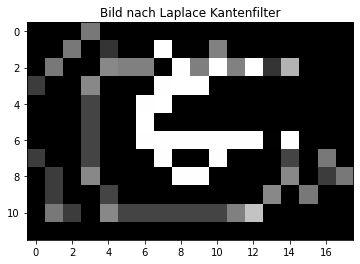

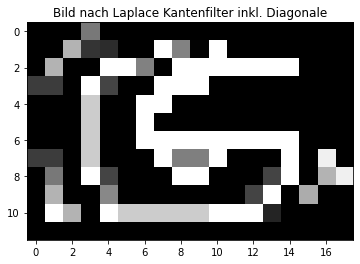

In [9]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

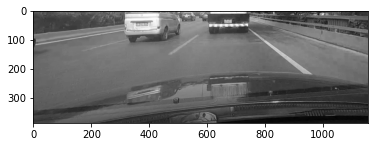

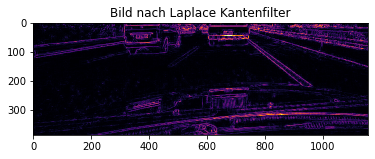

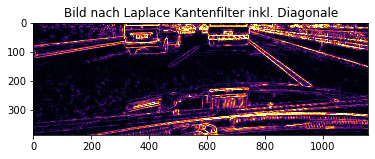

In [10]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)  # ACHTUNG: hier wurde der Anzeigeraum zur Visualisierung angepasst
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

## Sobel Kantenfilter

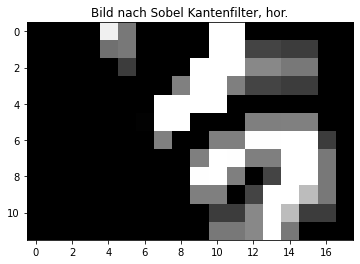

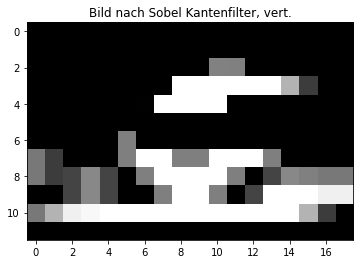

In [11]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

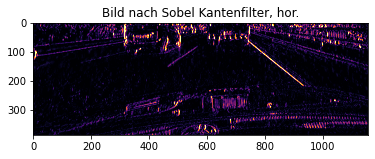

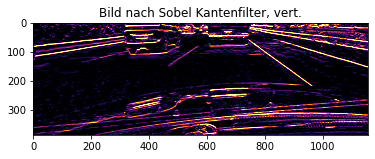

In [12]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

## Prewitt Kantenfilter

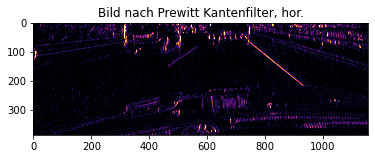

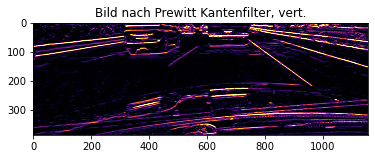

In [13]:
kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, vert.')
plt.show()

## Simpler Kantenfilter

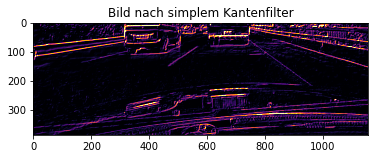

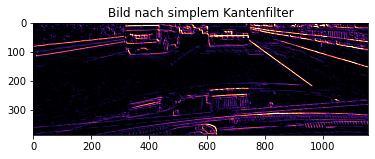

In [14]:
kernel = np.array([[-1, 0, 0], [0, 0, 0], [0, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

kernel = np.array([[0, 0, -1], [0, 0, 0], [1, 0, 0]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

## Relieffilter

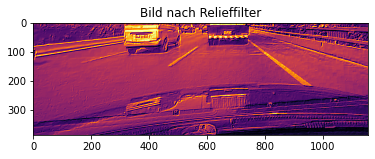

In [15]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap='inferno')
plt.title('Bild nach Relieffilter')
plt.show()

# Aufgaben

### Aufgabe 1: Welchen Einfluss hat die Filtergröße auf die Faltung?
- Je größer der Filter, desto "verwaschener" ist das Ausgabebild. Dadurch ist es z. B. bei einem großen Filter schwierig,
die Ausgangsform wiederzuerkennen.
- Je größer der Filter, desto kleiner ist das Ausgabebild, sofern kein Padding verwendet wird.

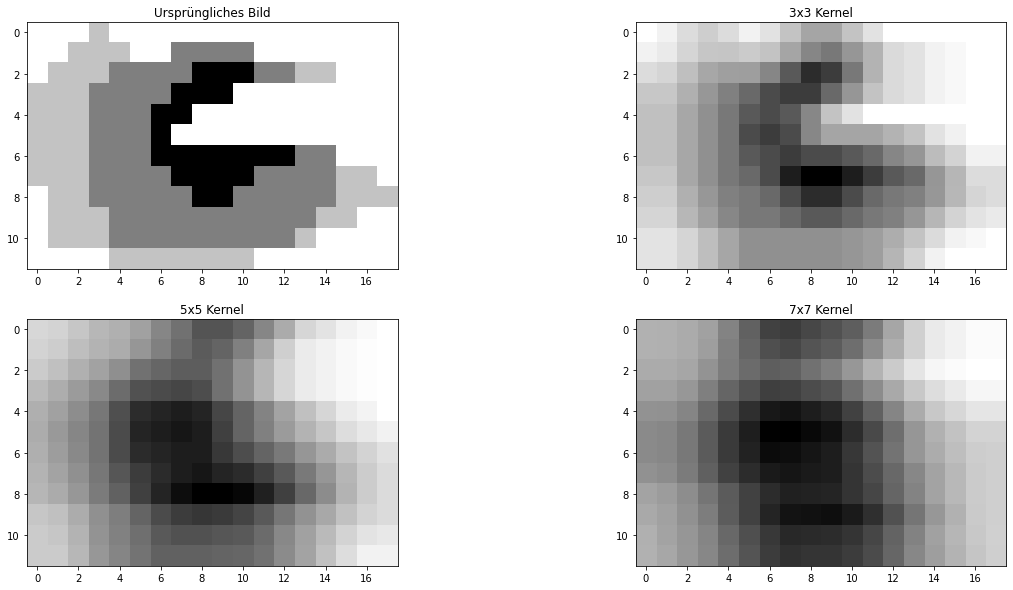

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Ursprüngliches Bild")

# Filterung mit 3x3 Kernel
plt.subplot(2, 2, 2)
plt.imshow(cv.filter2D(img, -1, np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], np.float32) / 9), cmap="gray")
plt.title("3x3 Kernel")

# Filterung mit 5x5 Kernel
plt.subplot(2, 2, 3)
plt.imshow(cv.filter2D(img, -1, np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
], np.float32) / 25), cmap="gray")
plt.title("5x5 Kernel")

# Filterung mit 7x7 Kernel
plt.subplot(2, 2, 4)
plt.imshow(cv.filter2D(img, -1, np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1]
], np.float32) / 49), cmap="gray")
plt.title("7x7 Kernel")

plt.show()

Diese Bilder verdeutlichen den eben beschriebenen Einfluss des Kernels. Mit einem 7x7 Kernel ist die ursprüngliche Form
des Bildes kaum mehr zu erkennen.

### Aufgabe 2: Welchen Einfluss hat der gewählte Ursprung des Filterelements?
Die Veränderung des Ursprungs des Kernels hat eine Verschiebung auf dem Ausgabebild zur Folge. Dies ist dem Fakt geschuldet,
dass der Ursprung angibt, auf welchen Pixel des Ausgabebilds die durchschnittliche Helligkeit der Nachbarn übertragen wird.

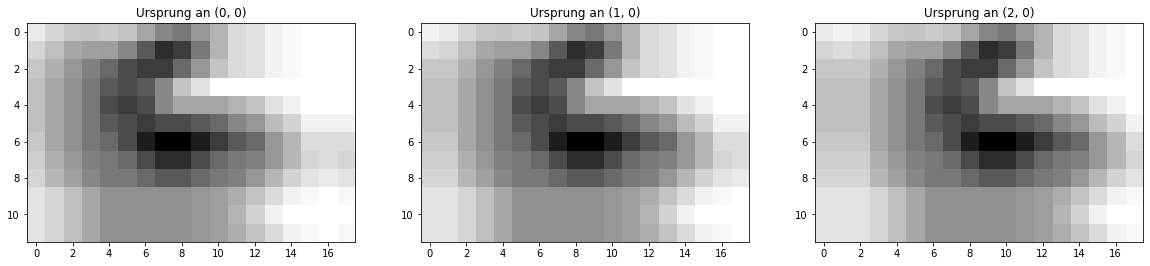

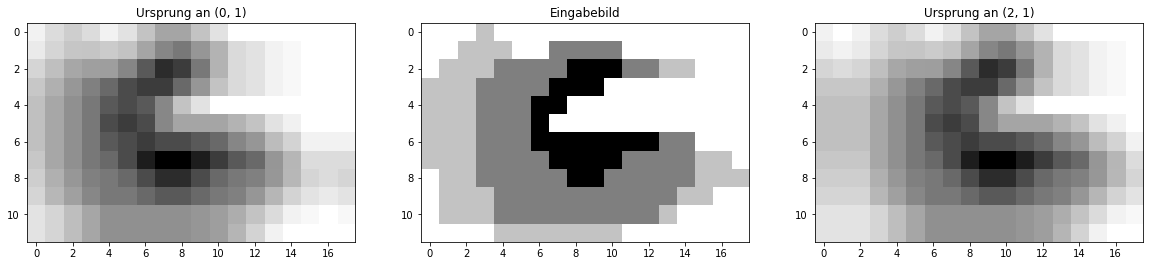

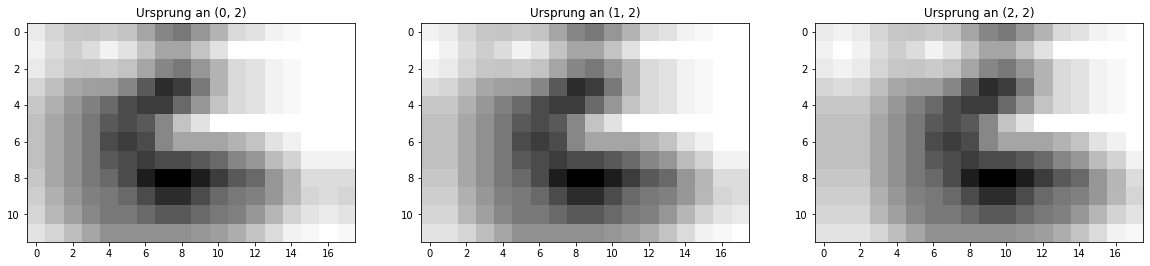

In [17]:
# Immer 3x3 Kernel nutzen
kernel = np.ones((3, 3), np.float32) / 9

# 3 Figure mit jeweils 3 Bildern erzeugen
for i in range(3):
    plt.figure(figsize=(20, 5))

    for j in range(3):
        plt.subplot(1, 3, j + 1)
        if i == j == 1:
            # Zentral Eingabebild anzeigen
            plt.imshow(img, cmap="gray")
            plt.title("Eingabebild")
        else:
            # Ursprung des Kernels mit anchor verschieben
            plt.imshow(cv.filter2D(img, -1, kernel, anchor=(j, i)), cmap="gray")
            plt.title(f"Ursprung an {j, i}")

    plt.show()

Jedes Bild in der obigen Grafik ist repräsentativ für die Positionierung des Ursprungs im Kernel. Der Ursprung (0, 0) ist
in der linken, oberen Ecke des Kernels, (2, 2) in der rechten, unteren Ecke.

Analog dazu kann die Verschiebung des Bildes wahrgenommen werden. Der zentrierte Ursprung wurde durch das Ursprungsbild
ausgetauscht, um die Verschiebung zu verdeutlichen.

### Aufgabe 3: Wie können Sie die Faltungsoperatoren für die Spurerkennung nutzen? Wenden Sie diese an.
- Durch spezielle Filter (Laplace, Sobel, Prewitt) können Kanten in dem Bild hervorgehoben werden
- Da Spurbegrenzungen in starkem Kontrast zu den benachbarten Pixeln stehen, sind die Kanten einer Spurlinie sehr ausgeprägt
und werden von besagten Filtern deutlich hervorgehoben

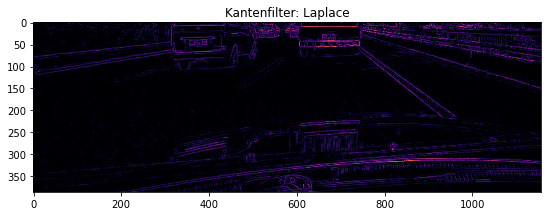

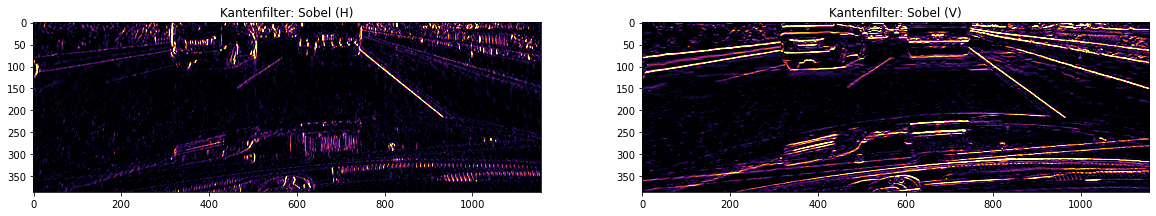

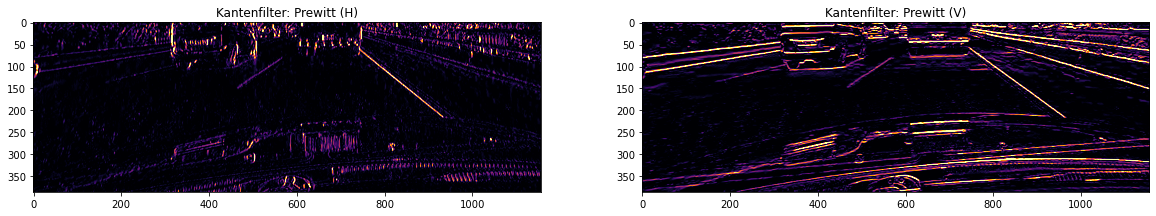

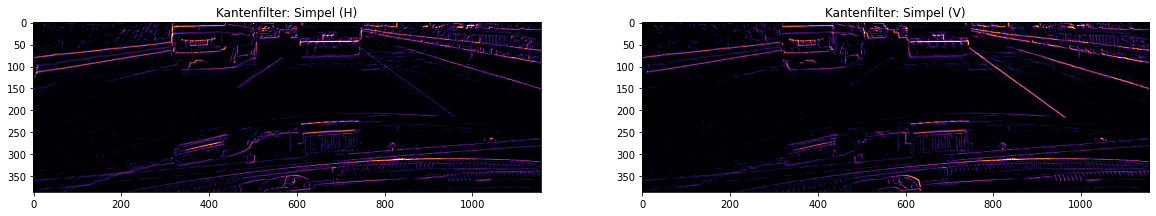

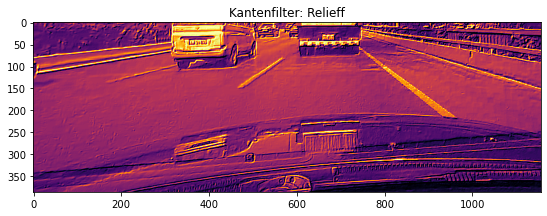

In [18]:
# Kernel erstellen
kernelLaplace = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], np.float32)

kernelSobelH = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], np.float32)

kernelSobelV = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], np.float32)

kernelPrewittH = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], np.float32)

kernelPrewittV = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
], np.float32)

kernelSimpelH = np.array([
    [-1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
], np.float32)

kernelSimpelV = np.array([
    [0, 0, -1],
    [0, 0, 0],
    [1, 0, 0]
], np.float32)

kernelRelieff = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
], np.float32)

# Kernel mit Bezeichnung zusammenfassen
kernels = {
    "Laplace": [kernelLaplace],
    "Sobel": [kernelSobelH, kernelSobelV],
    "Prewitt": [kernelPrewittH, kernelPrewittV],
    "Simpel": [kernelSimpelH, kernelSimpelV],
    "Relieff": [kernelRelieff]
}

nameList = ["H", "V"]

# Über alle Kernel iterieren
for key, value in kernels.items():
    plt.figure(figsize=(20, 5))

    # Alle möglichen Varianten des Kernel anwenden
    for i, kernel in enumerate(value):
        # Bezeichnung
        title = f"Kantenfilter: {key}"

        # Aufrufargumente für plt.imshow()
        args = {
            "cmap": "inferno"
        }

        # Falls zwei Kernel vorhanden sind jeweils horizontal oder vertikal Anmerken
        if len(value) > 1:
            title += f" ({nameList[i]})"

        # Helligkeit begrenzen
        if len(value) > 1 or key == "Laplace":
            args.update({
                "vmin": 0,
                "vmax": 100
            })

        # Anzeigen im jeweiligen Subplot
        plt.subplot(1, 2, i + 1)
        plt.imshow(cv.filter2D(img_lanes, -1, kernel), **args)
        plt.title(title)

    plt.show()

Die obigen Darstellungen zeigen die unterschiedlichen Funktionsweisen der Kantenfilter. Im Kontext der videobasierten
Fahrerassistenzsysteme ist ein vertikaler Filter für die Fahrspurerkennung am erfolgreichsten was die Identifikation aller
(!) Spurmarkierungen gilt. Die horizontalen Filter haben beispielsweise Probleme bei der Erkennung der äußersten
Fahrbahnmarkierung.
